# Interactive Python Tutorial: Image Registration

Here is a great lecture:

https://16385.courses.cs.cmu.edu/fall2020/lecture/transformations/slide_009

## Table of Contents
1. [Introduction to Image Registration](#introduction-to-image-registration)
2. [Theoretical Foundations](#theoretical-foundations)
   - [Mathematical Framework](#mathematical-framework)
   - [Transformation Models](#transformation-models)
   - [Similarity Metrics](#similarity-metrics)
   - [Optimization Techniques](#optimization-techniques)
3. [Image Registration Pipeline](#image-registration-pipeline)
4. [Practical Implementation](#practical-implementation)
   - [Setup and Prerequisites](#setup-and-prerequisites)
   - [Basic Image Alignment](#basic-image-alignment)
   - [Feature-Based Registration](#feature-based-registration)
5. [Applications](#applications)
6. [Advanced Topics](#advanced-topics)
7. [Exercises](#exercises)
8. [References](#references)

## Introduction to Image Registration

Image registration is the process of aligning two or more images of the same scene taken at different times, from different viewpoints, or by different sensors. The goal is to find the optimal spatial transformation that aligns these images to achieve the best possible match.

Think of it as overlaying transparencies: you want to adjust one image (the **moving** or **source** image) so that it perfectly aligns with another image (the **fixed** or **target** image).

### Key Terminology

- **Fixed/Reference/Target Image**: The image that remains stationary
- **Moving/Source Image**: The image that is transformed to align with the fixed image
- **Transformation**: The mathematical mapping that aligns the moving image with the fixed image
- **Similarity Metric**: A measure of how well the images are aligned
- **Registration**: The process of finding the optimal transformation

### Why Image Registration Matters

Image registration is fundamental in many fields:

- **Medical Imaging**: Aligning images from different modalities (MRI, CT, PET) or tracking changes over time
- **Remote Sensing**: Combining satellite imagery taken at different times or from different sensors
- **Computer Vision**: Stitching panoramas, tracking objects, or creating 3D models from multiple views
- **Augmented Reality**: Aligning virtual content with the real world

## Mathematical Basics of Image Registration

#### The Goal
Image registration aligns a *moving image* to a *fixed image* by finding a transformation \( T \). For example, if a pixel at \( (x, y) \) in the moving image should match \( (x', y') \) in the fixed image, \( T \) tells us how to move it.

#### Transformations
- **Translation**: Shifts the image by adding offsets, e.g., $x' = x + 10$, $ y' = y - 5 $.
- **Rotation**: Rotates around a point, e.g., using angles like $ x' = x \cos\theta - y \sin\theta $.
- In code, we compute a matrix (e.g., 2x3) to apply these changes.

#### Measuring Alignment
- **Same Images**: Compare pixel differences (e.g., subtract and square them).
- **Different Images (Multimodal)**: Use *mutual information* to check how much info overlaps, like matching patterns instead of exact values.

#### Finding the Best Fit
The computer tests different transformations (e.g., shift left, rotate 5°) and picks the one that makes the images most similar. It’s like trial and error, but smarter—using steps to improve the match.

### Mathematical Framework

At its core, image registration is an optimization problem. We aim to find a transformation T that, when applied to the moving image M, minimizes the difference between the transformed moving image and the fixed image F:

$$\hat{T} = \arg\min_T \mathcal{D}(F, T(M))$$

Where:
- $\hat{T}$ is the optimal transformation
- $\mathcal{D}$ is a dissimilarity metric (lower values indicate better alignment)

### Transformation Models

Transformations define how the moving image can be manipulated to align with the fixed image. They vary in complexity and degrees of freedom:

#### Rigid Transformations
Preserve distances between points, allowing only rotation and translation (6 degrees of freedom in 3D, 3 in 2D).

For 2D images, a rigid transformation can be represented as:

$$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix}$$

Where:
- $(x', y')$ are the coordinates in the transformed image
- $(x, y)$ are the original coordinates
- $\theta$ is the rotation angle
- $(t_x, t_y)$ is the translation vector

https://ncase.me/matrix/

#### Affine Transformations
Preserve parallel lines but allow for shearing and scaling (12 degrees of freedom in 3D, 6 in 2D).

For 2D images:

$$\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a_{11} & a_{12} & t_x \\ a_{21} & a_{22} & t_y \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$$

### Similarity Metrics

Similarity metrics quantify how well two images are aligned. The choice depends on the nature of the images:

#### Mean Squared Error (MSE)
For images of the same modality:

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (F(i) - T(M)(i))^2$$

#### Normalized Cross-Correlation (NCC)
More robust to intensity differences:

$$\text{NCC} = \frac{\sum_{i} (F(i) - \bar{F})(T(M)(i) - \overline{T(M)})}{\sqrt{\sum_{i} (F(i) - \bar{F})^2 \sum_{i} (T(M)(i) - \overline{T(M)})^2}}$$

#### Mutual Information (MI)
For multi-modal registration, based on information theory:

$$\text{MI}(F, T(M)) = H(F) + H(T(M)) - H(F, T(M))$$

Where:
- $H(F)$ and $H(T(M))$ are the entropies of the fixed and transformed moving images
- $H(F, T(M))$ is their joint entropy

### Optimization Techniques

Once we've defined our transformation model and similarity metric, we need optimization algorithms to find the best transformation parameters:

#### Gradient Descent
Iteratively updates parameters in the direction of the negative gradient:

$$\theta_{t+1} = \theta_t - \alpha \nabla_\theta \mathcal{D}(F, T_\theta(M))$$

Where $\alpha$ is the learning rate.

There is also other methods such as Powell's Method and Evolutionary Algorithms


## Image Registration Pipeline

A typical image registration workflow consists of these steps:

1. **Pre-processing**: Enhance image quality, remove noise, normalize intensities
2. **Feature extraction** (for feature-based methods): Detect and match keypoints
3. **Transformation estimation**: Find the optimal transformation
4. **Transformation application**: Apply the transformation to the moving image
5. **Interpolation**: Calculate pixel values at non-integer coordinates
6. **Evaluation**: Assess the quality of registration

## Practical Implementation

Let's implement image registration techniques using Python, starting with necessary libraries and progressing to more complex methods.


Left image ("Fixed MRI-like"): A simulated MRI scan showing a square tissue region with a circular lesion and some noise added to mimic MRI characteristics.


Right image ("Moving CT-like"): The same tissue and lesion but simulated as a CT scan, which has been rotated, shifted, and has inverted contrast (common differences between imaging modalities).



In [11]:
# This function optimizes values for affine.
cv2.estimateAffinePartial2D?

Docstring:
estimateAffinePartial2D(from_, to[, inliers[, method[, ransacReprojThreshold[, maxIters[, confidence[, refineIters]]]]]]) -> retval, inliers
.   @brief Computes an optimal limited affine transformation with 4 degrees of freedom between
.   two 2D point sets.
.   
.   @param from First input 2D point set.
.   @param to Second input 2D point set.
.   @param inliers Output vector indicating which points are inliers.
.   @param method Robust method used to compute transformation. The following methods are possible:
.   -   @ref RANSAC - RANSAC-based robust method
.   -   @ref LMEDS - Least-Median robust method
.   RANSAC is the default method.
.   @param ransacReprojThreshold Maximum reprojection error in the RANSAC algorithm to consider
.   a point as an inlier. Applies only to RANSAC.
.   @param maxIters The maximum number of robust method iterations.
.   @param confidence Confidence level, between 0 and 1, for the estimated transformation. Anything
.   between 0.95 and 0.99 i

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

# Load the astronaut image from scikit-image
def load_astronaut():
    astronaut = data.astronaut()
    # Convert to grayscale if needed
    if len(astronaut.shape) == 3:
        astronaut_gray = cv2.cvtColor(astronaut, cv2.COLOR_RGB2GRAY)
    else:
        astronaut_gray = astronaut
    return astronaut_gray

def create_transformed_image(image, angle=15, tx=20, ty=30):
    # Get dimensions
    h, w = image.shape[:2]
    
    # Create a rotation/translation matrix
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
    M[0, 2] += tx  # x translation
    M[1, 2] += ty  # y translation
    
    # Apply the transformation
    transformed = cv2.warpAffine(image, M, (w, h))
    
    return transformed, M

def display_images(fixed, moving, aligned=None, title="Image Registration"):
    if aligned is None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(title, fontsize=16)
        
        axes[0].imshow(fixed, cmap='gray')
        axes[0].set_title('Fixed Image')
        axes[0].axis('off')
        
        axes[1].imshow(moving, cmap='gray')
        axes[1].set_title('Moving Image (Rotated + Shifted)')
        axes[1].axis('off')
    else:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(title, fontsize=16)
        
        axes[0].imshow(fixed, cmap='gray')
        axes[0].set_title('Fixed Image')
        axes[0].axis('off')
        
        axes[1].imshow(moving, cmap='gray')
        axes[1].set_title('Moving Image (Rotated + Shifted)')
        axes[1].axis('off')
        
        axes[2].imshow(aligned, cmap='gray')
        axes[2].set_title('Aligned Image')
        axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

def feature_based_registration(fixed, moving):
    # Detect ORB features
    orb = cv2.ORB_create(nfeatures=1000)
    
    # Find keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(fixed, None)
    kp2, des2 = orb.detectAndCompute(moving, None)
    
    # Match features
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    
    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Take the best matches
    good_matches = matches[:50]
    
    # Extract location of matched keypoints
    src_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    
    # Find transformation matrix 
    M, inliers = cv2.estimateAffinePartial2D(src_pts, dst_pts)
    
    # Apply transformation
    h, w = fixed.shape[:2]
    aligned = cv2.warpAffine(moving, M, (w, h))
    
    # Create image with matches for visualization
    match_img = cv2.drawMatches(fixed, kp1, moving, kp2, good_matches, None, 
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return aligned, M, match_img

def visualize_checkerboard(img1, img2, grid_size=50):
    """Create a checkerboard visualization of two aligned images"""
    h, w = img1.shape[:2]
    checkerboard = np.zeros_like(img1)
    
    for i in range(0, h, grid_size):
        for j in range(0, w, grid_size):
            if (i // grid_size + j // grid_size) % 2 == 0:
                checkerboard[i:i+grid_size, j:j+grid_size] = img1[i:i+grid_size, j:j+grid_size]
            else:
                checkerboard[i:i+grid_size, j:j+grid_size] = img2[i:i+grid_size, j:j+grid_size]
    
    return checkerboard

In [13]:
original.shape

(512, 512)

In [14]:
transformed.shape

(512, 512)

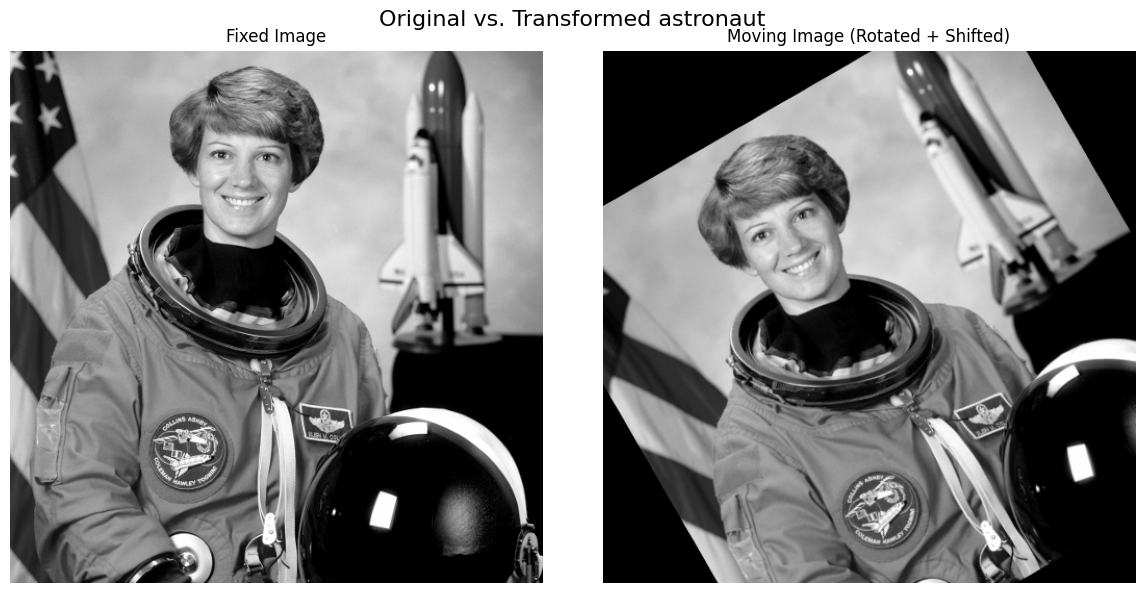

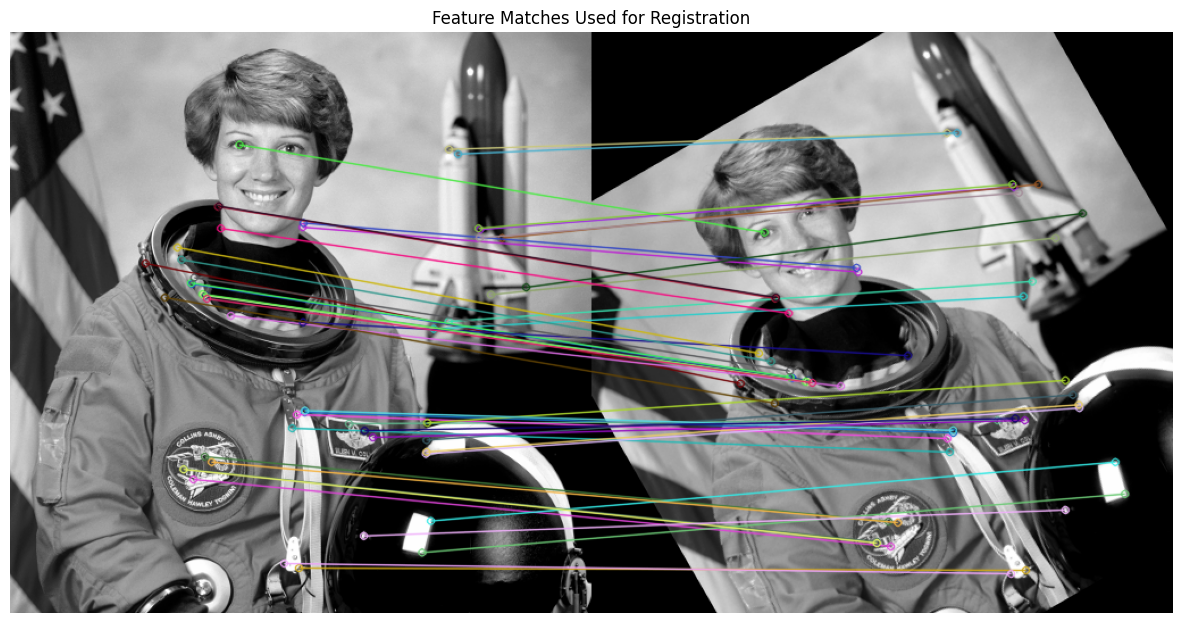

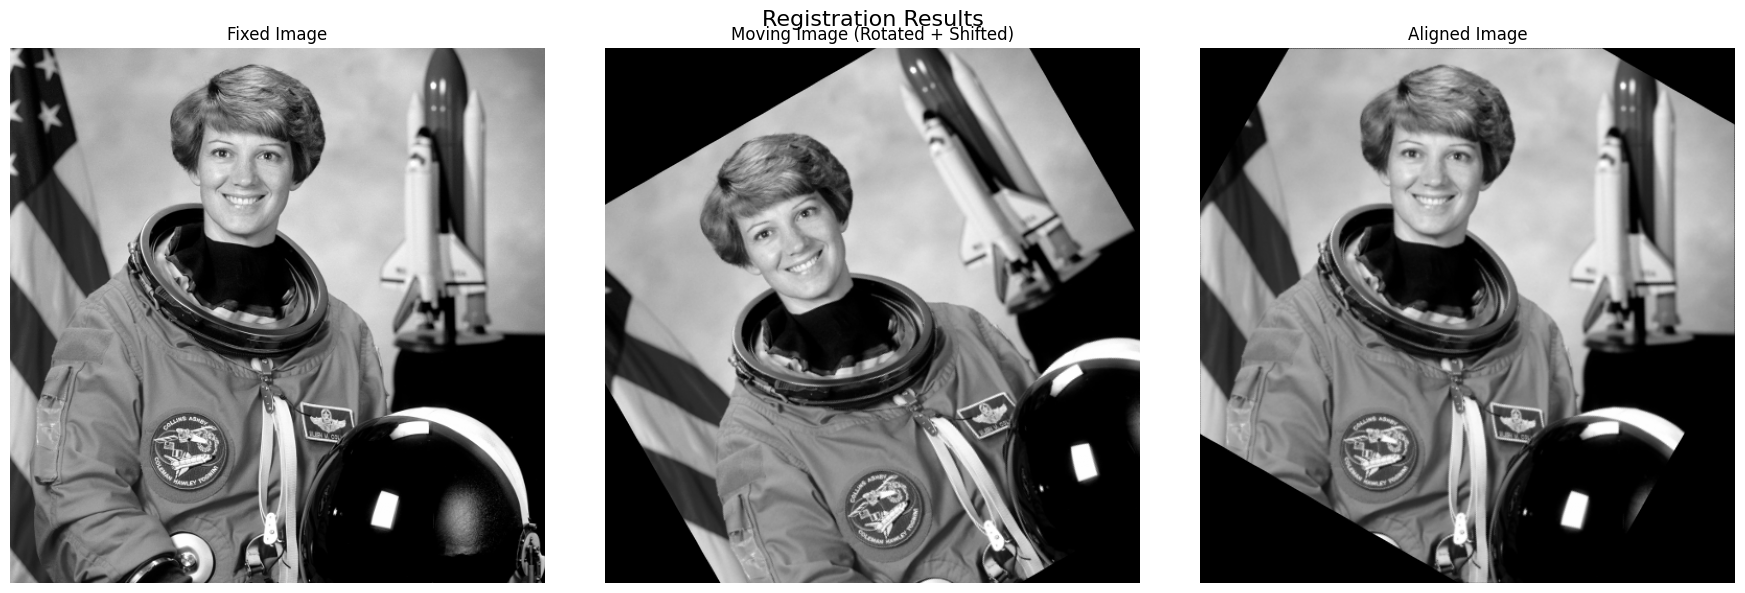

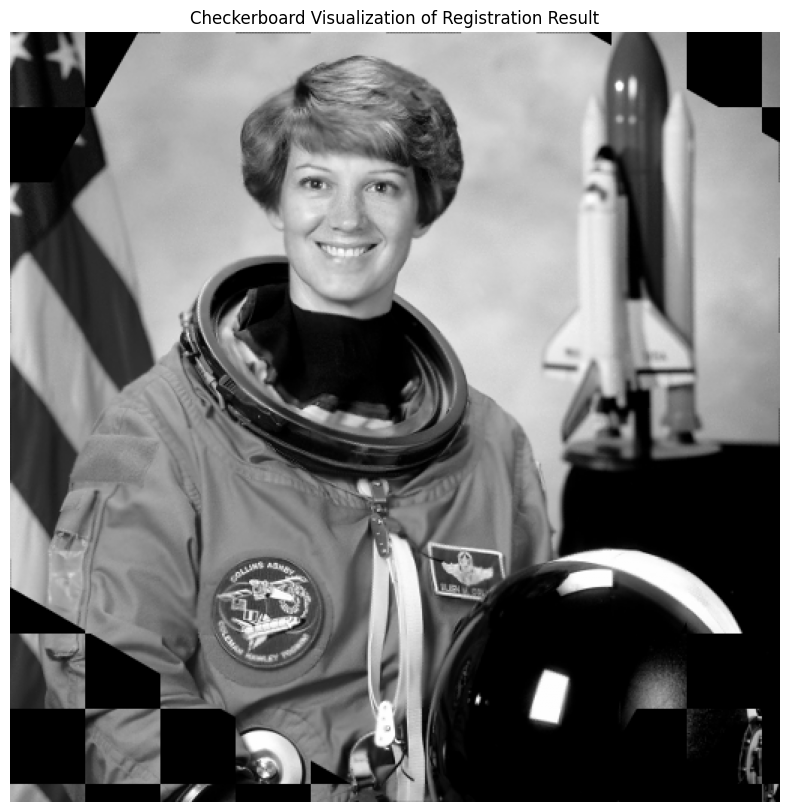

True transformation matrix:
[[  0.8660254    0.5        -73.70250337]
 [ -0.5          0.8660254  192.29749663]]

Estimated transformation matrix:
[[   0.86588041   -0.49947358  159.7348633 ]
 [   0.49947358    0.86588041 -129.27196184]]

Transformation matrix error: 397.3687


In [15]:
original = load_astronaut()

# 2. Create a transformed version

# Note: The values for angle, tx, and ty are what get optimized  for.
transformed, true_matrix = create_transformed_image(original, angle=30, tx=20, ty=30)

# 3. Display original and transformed images
display_images(original, transformed, title="Original vs. Transformed astronaut")

# 4. Perform feature-based registration
aligned, estimated_matrix, match_img = feature_based_registration(original, transformed)

# 5. Display feature matches
plt.figure(figsize=(15, 10))
plt.imshow(match_img)
plt.title('Feature Matches Used for Registration')
plt.axis('off')
plt.show()

# 6. Display registration results
display_images(original, transformed, aligned, title="Registration Results")

# 7. Create and display checkerboard visualization
checkerboard = visualize_checkerboard(original, aligned, grid_size=50)
plt.figure(figsize=(10, 10))
plt.imshow(checkerboard, cmap='gray')
plt.title('Checkerboard Visualization of Registration Result')
plt.axis('off')
plt.show()

# 8. Print transformation matrices
print("True transformation matrix:")
print(true_matrix)
print("\nEstimated transformation matrix:")
print(estimated_matrix)

# 9. Calculate registration error
error = np.linalg.norm(true_matrix - estimated_matrix)
print(f"\nTransformation matrix error: {error:.4f}")



# Add a loop which iterates and minimizes error (for example)

another cool application: 
https://pyimagesearch.com/2020/08/31/image-alignment-and-registration-with-opencv/
